In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML
#Se definen temas
cf.set_config_file(sharing='public',theme='pearl',offline=True) # write cf.getThemes() to find all themes available

In [24]:
#Leo mi archivo.csv
Covid = pd.read_csv("COVID19MEXICO_Bueno.csv")
#Filtro por filas
Covid= Covid.iloc[0:100000,: ]
Covid


C:\Users\papit\AppData\Local\Temp\ipykernel_16108\2809429721.py:2: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,NaN,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,NaN,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


# Identificación de valores nulos

In [25]:
#Se comprueban valores nulos 
valores_nulos=Covid.isnull().sum()
valores_nulos
#No se encuentran valores nulos 

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   1
ENTIDAD_UM               1
SEXO                     1
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            1
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     3
NACIONALIDAD             0
EMBARAZO                 2
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             1
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               1
OTRO_CASO                1
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       1
CLASIFICACION_FINAL      0
M

In [32]:
#Comenzamos con los nulos encontrados:
#Remplazamos los valores de SECTOR con la moda
Covid["SECTOR"]= Covid["SECTOR"].fillna(Covid["SECTOR"].mode) 
#Remplazamos los valores de ENTIDAD_UM con la moda
Covid["ENTIDAD_UM"]= Covid["ENTIDAD_UM"].fillna(Covid["ENTIDAD_UM"].mode)
#Nos deshacemos del registro faltante en SEXO
Covid["SEXO"]= Covid["SEXO"].dropna(0) 
#Remplazamos los valores de MUNICIPIO_RES con la moda
Covid["MUNICIPIO_RES"]= Covid["MUNICIPIO_RES"].fillna(Covid["MUNICIPIO_RES"].mode) 
#Remplazamos los valores de EDAD con la moda
Covid["EDAD"]= Covid["EDAD"].fillna(Covid["EDAD"].mean) 
#Nos deshacemos de los registros faltantes de EMBARAZO
Covid["EMBARAZO"]= Covid["EMBARAZO"].dropna(0) 
#Remplazamos los valores de PAIS_NACIONALIDAD con la moda: México
Covid["PAIS_NACIONALIDAD"]= Covid["PAIS_NACIONALIDAD"].fillna("México") 
#Remplazamos los valores de HIPERTENSION con la moda
Covid["HIPERTENSION"]= Covid["HIPERTENSION"].fillna(Covid["HIPERTENSION"].mode)

C:\Users\papit\AppData\Local\Temp\ipykernel_16108\1066054035.py:4: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only.

C:\Users\papit\AppData\Local\Temp\ipykernel_16108\1066054035.py:7: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only.



In [35]:
#Hacemos la comprobación de NAs
#Se comprueban valores nulos 
valores_nulos=Covid.isnull().sum()
valores_nulos

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
M

In [28]:
#Reemplazamos los 4 valores restantes en el dataframe 
Covid =Covid.fillna(0) 
Covid
#Comprobamos nuevamente 
valores_nulos=Covid.isnull().sum().sum()
valores_nulos

0

In [29]:
#Ante duda, se hace una prueba para comprobar la sustitución adecuada de NAs
#Convertir DataFrame a CSV
#Covid.to_csv("Prueba.csv")

# Identificación de outliers 

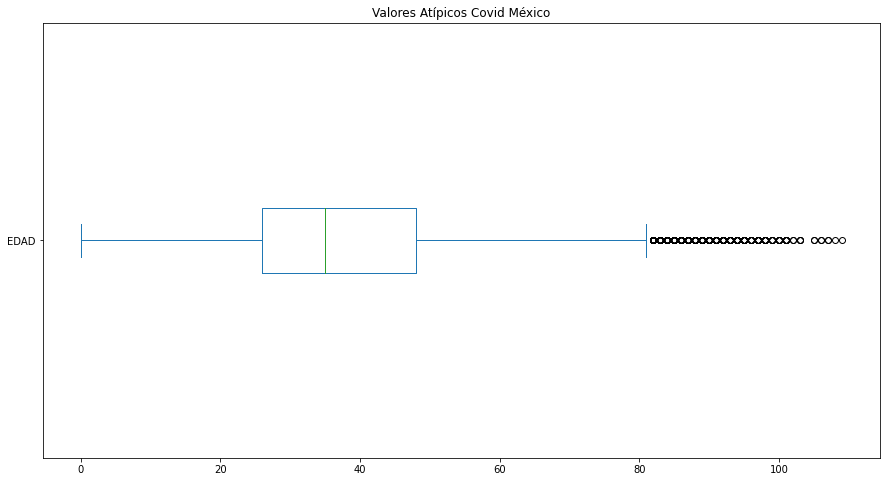

In [33]:
#En los datos de nuestra base hace sentido buscar únicamente outliers en la columna Edad
#Realizamos diagrama de caja o bigote de cada columna del dataframe para identificar outliers
fig = plt.figure(figsize =(15, 8))
Covid["EDAD"].plot(kind='box', vert=False)
plt.title("Valores Atípicos Covid México")
plt.show() #dibujamos el diagrama
#Observamos que existen valores atípicos para la variable Edad
#Vemos que existen registros arriba de los 100 años, aunque es posible que se trate de valores
#Reales, trataremos estos outliers para facilitar el análisis y visualización de la información 

In [31]:
#Utilizaremos el método de tratamiento de outliers aplicando desviación estandar. Encuentro los valores extremos
y=Covid["EDAD"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
#Una vez definido el número, encontramos los outliers del dataframe 
outliers= Covid[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers
#Se obtienen los datos sin outliers del data frame Covid 
Covid_clean= Covid[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Covid_clean

Limite superior permitido 84.82067498662707
Limite inferior permitido -11.044054986627067


,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12.0,23.0,2.0,27,23,8.0,...,2.0,2,97,1,2.0,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9.0,25.0,2.0,25,25,1.0,...,2.0,2,97,1,2.0,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9.0,9.0,1.0,9,9,14.0,...,2.0,1,1,2,97.0,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12.0,9.0,1.0,9,9,2.0,...,1.0,2,97,1,2.0,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12.0,9.0,1.0,9,9,7.0,...,1.0,2,97,1,2.0,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12.0,9.0,1.0,11,15,31.0,...,2.0,1,2,1,2.0,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,<bound method Series.mode of 0 12.0\n1 ...,9.0,2.0,15,15,95.0,...,1.0,2,97,1,2.0,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4.0,<bound method Series.mode of 0 23.0\n1 ...,2.0,28,28,22.0,...,1.0,2,97,1,1.0,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4.0,9.0,1.0,15,9,6.0,...,1.0,2,97,1,1.0,3,99,México,97,97


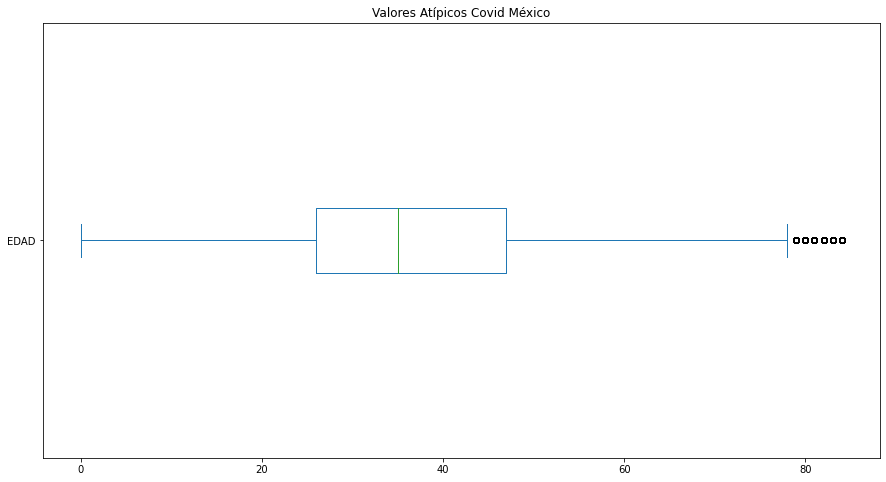

In [36]:
#Hacemos un boxplot para verificar que nuestro tratamiento de outliers haya sido efectivo
#Realizamos diagrama de caja o bigote de cada columna del dataframe para identificar outliers
fig = plt.figure(figsize =(15, 8))
Covid_clean["EDAD"].plot(kind='box', vert=False)
plt.title("Valores Atípicos Covid México")
plt.show()
#La transformación se ha efectuado de forma adecuada

# Visualización 

In [157]:
#Para facilitar nuestras visualizaciones modifiquemos algunos de los códigos de la base
#INTUBADO 
Covid_clean['INTUBADO'] = Covid_clean['INTUBADO'].replace([97,99],0)

In [134]:
cf.getThemes()
#Comenzamos con la restructuración del dataframe 
#La función pivot establece un índice, columns establece las columnas (índice, columnas y datos)
#La columna elegida como índice no debe tener entradas duplicadas 
#Se selecciona una submuestra de nuestro dataframe para facilitar la visualización 
Data_short= Covid_clean.sample(n = 100)
Data_short= Data.pivot(index='ID_REGISTRO', columns='SEXO',  values='EDAD')
Data_short

SEXO,1.0,2.0
ID_REGISTRO,,
013a0e,NaN,23.0
01e27d,NaN,81.0
02380f,NaN,62.0
03a438,35.0,NaN
03b5db,NaN,34.0
...,...,...
ed2f36,NaN,38.0
ed3a4c,25.0,NaN
eddf65,35.0,NaN


In [135]:
# Gráfico de líneas: 
# Se elabora un gráfico acerca de la edad por sexo de los contagiados de COVID 19 
# plotting
Data_short.iplot(kind='line', xTitle='ID',
                           yTitle='Edad', title='Edad de los contagiados (n=500)')

In [132]:
#Gráfico de barras 
#Tomamos una muestra de 100 personas para nuestra gráfica
Data_0= Covid_clean.sample(n = 100)
Data_0= Data_0.pivot(index='ID_REGISTRO', columns='SEXO',  values='EDAD')
Data_0

SEXO,1.0,2.0
ID_REGISTRO,,
48be17,54.0,NaN
4a1716,50.0,NaN
4af218,NaN,32.0
4bf03f,NaN,38.0
4d6ebb,35.0,NaN
...,...,...
e6b0d9,NaN,59.0
e6f044,33.0,NaN
e841e5,NaN,21.0


In [133]:
#Se elabora un gráfico acerca de la edad por sexo de los contagiados de COVID 19
Data_0.iplot(kind='bar', xTitle='ID',
                           yTitle='EDAD', title='Edad de los contagiados por sexo') # 1 mujer #2hombre

In [141]:
#Box plot
# Se elabora un boxplot acerca de la edad por sexo de los contagiados de COVID 19
Data_0.iplot(kind='box', xTitle='Sexo de los contagiad@',
                    yTitle='Edad', title='Edad de los contagiados por sexo')


In [140]:
#Histograma
# Se elabora un histograma de frecuncia para la edad de los hombres 
Data_0[[2]].iplot(kind='hist',xTitle='Población', 
                           title='Distribución de la frecuencia de edades de hombres contagiados')

In [158]:
#Scatterplot: 
#Restructuremos el dataframe para la siguiente visualización 
Data_s= Covid_clean.sample(n = 500)
Data_s= Data_s.pivot(index='ID_REGISTRO', columns='INTUBADO',  values='EDAD')
Data_s

INTUBADO,0,1,2
ID_REGISTRO,,,
42d05f,33.0,NaN,NaN
476050,26.0,NaN,NaN
478485,33.0,NaN,NaN
47b209,43.0,NaN,NaN
47ca9c,24.0,NaN,NaN
...,...,...,...
ec0d33,55.0,NaN,NaN
ec78d6,22.0,NaN,NaN
ed07af,37.0,NaN,NaN


In [159]:
#Se grafica un scatterplot para representar la intubación por edad
Data_s.iplot(kind='scatter', mode='markers',xTitle='ID', 
                               title='Intubación por edad')